# L06: The average quiet day of the month

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np

# our library
import i4s_lib as i4s

folder='i4s_geomag_data/'
month='201303'

# observatories used in Dst index
obs=['her','hon','kak','sjg']

# quiets days for the month of March 2013
qs=['08','07','26','25','13']

# variable to contain all the values (1440 minutes) of all four observatories,
# for the five quiet days
dat = np.zeros([len(obs),len(qs),1440])

# read all the quiet days of the month for each observatory (only the H component (c1))
for o in obs:
    for q in qs:
        filename=o + month + q + '*min.min'
        df=i4s.read_im(filepattern=filename,folder=folder)
        data=df['data']
        dat[obs.index(o)][qs.index(q)][:]=data.c1

# Show all five quietest days of the month superposed

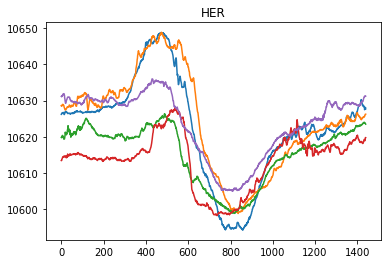

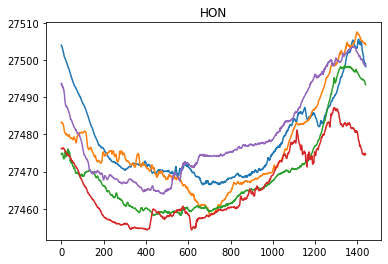

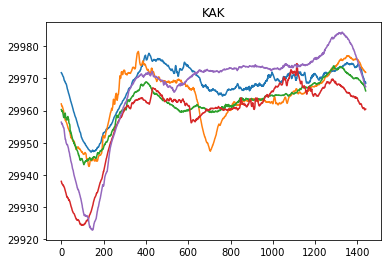

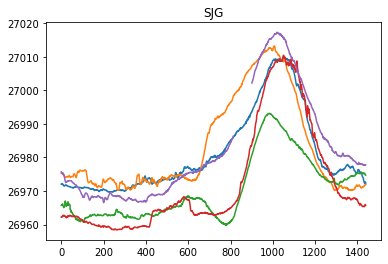

In [2]:
# Quietest days of the month for each observatory
for io in range(4): # iterate on the observatories
    for i in range(len(qs)): # iterate on the quiet days
        plt.plot(dat[io][i][:]);
        plt.title(obs[io].upper())
    plt.show()

## Q01: Does the results make sense to you?

### A01:

# Let's superposed also the average quiet day

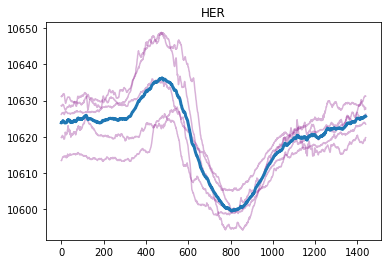

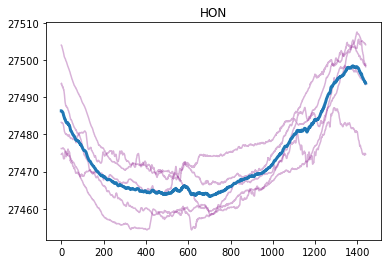

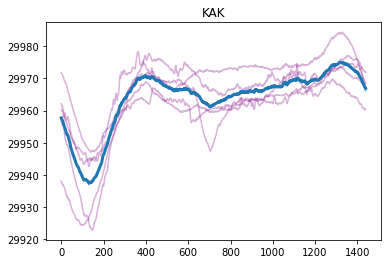

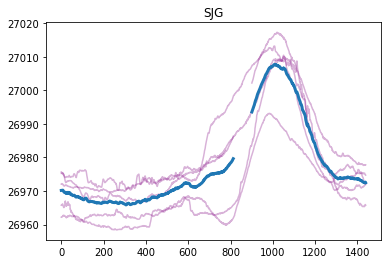

In [3]:
# Create the average quiet day for each observatory
quiets = np.zeros([len(obs),1440])
for io in range(4): # iterate on the observatories
    quiets[io][:]=np.mean(dat[io][:][:],axis=0)
# Display them
for io in range(4): # iterate on the observatories
    for i in range(len(qs)): # iterate on quiet days
        plt.plot(dat[io][i][:], color='purple', alpha=0.3);
        plt.title(obs[io].upper())
    plt.plot(quiets[io][:], linewidth=3); # show the average quiet day
    plt.show()

## Q02: What range in nT, aproximately, change the quiet days respect the average?

### A02:

# Let's replicate the average day for the whole month

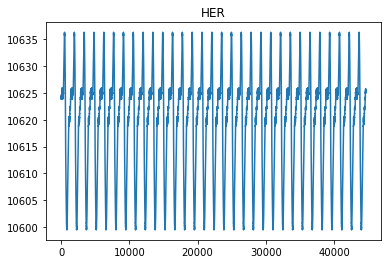

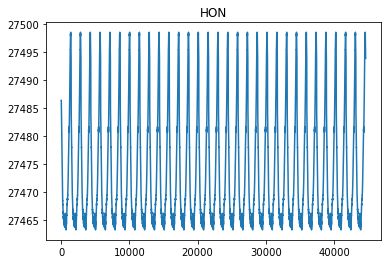

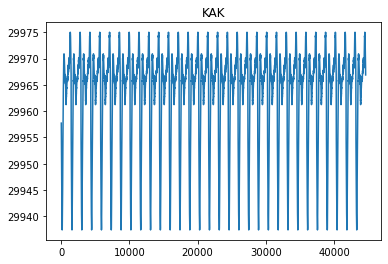

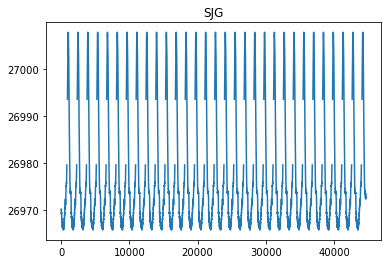

In [4]:
sq = np.zeros([len(obs),31,1440]) # variable that contains for the four observatories, 31 days of 1440 minutes
# Replicate the quiet day the whole month for each observatory
for io in range(4):
    for i in range(31):
        sq[io][i][:] = quiets[io][:]

# Display
for io in range(4):  # iterate on the observatories
    plt.plot(sq[io][:][:].reshape(-1));
    plt.title(obs[io].upper())
    plt.show()

## Q03: What ranges of values have the daily variation for each observatory?

### A03:

# Let's see a zoom (only five days)

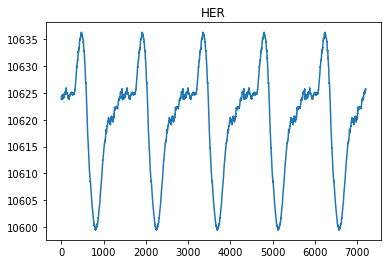

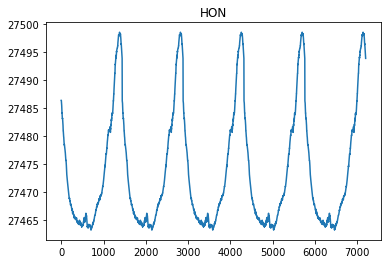

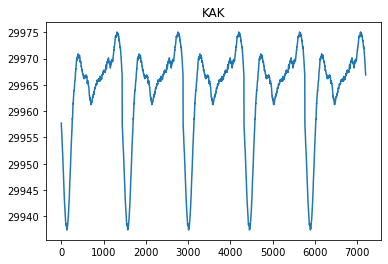

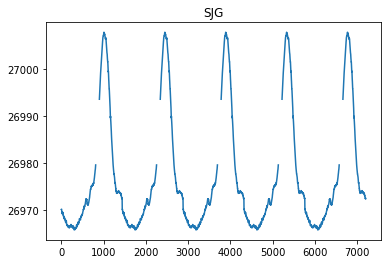

In [5]:
# Display only five days
for io in range(4):  # iterate on the observatories
    plt.plot(sq[io][0:5][:].reshape(-1));
    plt.title(obs[io].upper())
    plt.show()